In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [120]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import distinct, func
import sqlite3

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_data_point=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_point



('2017-08-23')

In [13]:
#select precip data
sel=[Measurement.date, Measurement.prcp]

Precip=session.query(*sel).\
    filter(Measurement.date > '2016-08-22').all()
                  

[]

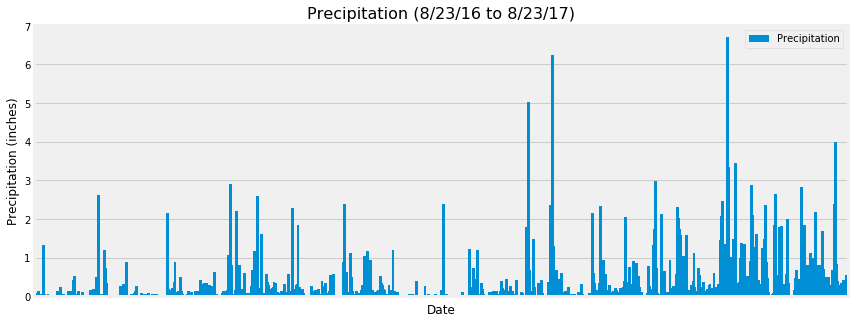

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation=pd.DataFrame(Precip, columns=["Date", "Precipitation"])
Precipitation.set_index("Date", inplace=True)
   
ax = Precipitation.plot(kind='bar',width=8,figsize=(13,5))


# set grid and labels

ax.xaxis.grid()
ax.set_title('Precipitation (8/23/16 to 8/23/17)',fontsize= 16)
ax.set_ylabel("Precipitation (inches)")
ax.set_xticklabels([])

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel=[Measurement.station, 
    func.count(Measurement.prcp)]

Stations=session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()
    

Stations
                  

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [17]:
sel=[Measurement.station, 
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]
 

Active_Station_Info=session.query(*sel).\
    filter(Measurement.station=="USC00519281").all()
    
Active_Station_Info=pd.DataFrame(Active_Station_Info, columns=["Station", "Min Temp", "Max Temp", "Avg Temp"])


Active_Station_Info

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


In [18]:
# Choose the station with the highest number of temperature observations.
sel=[Measurement.station, 
    func.count(Measurement.tobs)]

Temps=session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()

Temps

('USC00519281', 2772)

In [19]:
# Query the last 12 months of temperature observation data for this station 

sel=[Measurement.station, Measurement.date, Measurement.tobs]

last_data_temp=session.query(*sel).\
    filter(Measurement.station=="USC00519281",Measurement.date > '2016-08-18' ).\
       order_by(Measurement.date.desc()).all()

last_data_temp


[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

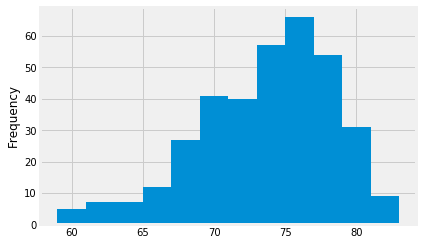

In [20]:
#plot the results as a histogram
Temp_df=pd.DataFrame(last_data_temp, columns=["Station", "Date", "Temp"])

Temp_df.Temp.plot(kind='hist',bins=12)


![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [129]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start='2017-02-14'
end='2017-02-24'


query_date_start = dt.datetime.strptime(start, '%Y-%m-%d')- relativedelta(years=1)
query_date_end = dt.datetime.strptime(end, '%Y-%m-%d') - relativedelta(years=1)


Calc_Temp_Data=calc_temps(query_date_start, query_date_end)

Calc_Temp_Data

[(60.0, 70.609375, 79.0)]

[]

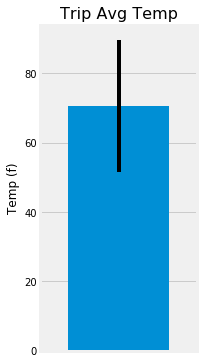

In [130]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

Calc_Temp_df=pd.DataFrame(Calc_Temp_Data, columns=["Min_Temp", "Avg_Temp", "Max_Temp"])
set_yerr=Calc_Temp_df.Max_Temp - Calc_Temp_df.Min_Temp
ax = Calc_Temp_df.Avg_Temp.plot(kind='bar',width=.9,figsize=(2.5,6),yerr=set_yerr)


# set grid and labels

ax.xaxis.grid()
ax.set_title('Trip Avg Temp',fontsize= 16)
ax.set_ylabel("Temp (f)")
ax.set_xticklabels([])

In [127]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


# date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

start='2017-02-14'
end='2017-02-24'


query_date_start = dt.datetime.strptime(start, '%Y-%m-%d')- relativedelta(years=1)
query_date_end = dt.datetime.strptime(end, '%Y-%m-%d') - relativedelta(years=1)


sel=[Measurement.station,
     Station.name,
     Station.latitude,
     Station.longitude,
     Station.elevation,
     func.sum(Measurement.prcp)]

Precip=session.query(*sel).\
    filter(Measurement.station==Station.station).\
    filter(Measurement.date.between(query_date_start, query_date_end)).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
    
Precip


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.74),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.57),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.52),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.49000000000000005),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.33999999999999997),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.29),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [128]:
#display previous data in pandas df
Precip_df=pd.DataFrame(Precip, columns=["Station ID", "Station Location",
                            "Latitude","Longitude", "Elevation", "Total Precipitation"])

Precip_df

,Station ID,Station Location,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.74
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.57
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.52
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.49
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.34
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.29
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [64]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
